# Postagens do INSTAGRAM

## Segunda parte

A segunda parte da entrega consiste em um novo relatório sobre os posts das marcas. 

### Etapa 1 - Buscar & Salvar os dados no BQ

Para cada Post (por conta):

- Comentários
  - Número de comentários em cada postagem
  
- Likes
  - Número de likes em cada postagem
  
- Compartilhamentos
  - Número de compartilhamentos

- Tipo de post
  - Pode ser Reel, Carrossel, Post etc

- Link da imagem do post

- Descrição/legenda
  - Registrar o que a conta escreveu como legenda

- Contas marcadas
  - Registrar quais foram as contas marcadas na postagem

- Hashtags usadas
  - Registrar quais foram as hashtags adicionadas na postagem

- Data de publicação
  - Dia que o post foi publicado

- Data da última busca/atualização
  - Dia que buscamos os dados


### Etapa 2 - Tratar os dados do BQ e gerar relatório

Para o relatório (por conta):
- Média de comentários
  - Qtde de comentários nos posts da semana / Qtde posts na semana
- Média de likes
  - Qtde de Likes nos posts da semana / Qtde posts na semana
- Média de compartilhamentos
  - Qtde de Compartilhamentos nos posts da semana / Qtde posts na semana
- Quantidade de posts por semana


# Buscamos dados das seguintes marcas:

## Próprias: @
- mmartanoficial (MMartan)
- santistadecora (Santista)
- artex (Artex)

## Concorrentes: @
- artelasse (Artelasse)
- camicado (Camicado)
- casaalmeidaoficial (Casa Almeida)
- casariachuelo (Casa Riachuelo)
- karstenoficial (Karsten)
- mundodoenxoval (Mundo do Enxoval)
- trussardioficial (Trussardi)
- zeloloja (Zelo)

## Lista dos usuários


@ - "altenburg.oficial",

@ - "altenburghaus",

@ - "artelasse",

@ - "artex",

@ - "buddemeyeroficial",

@ - "casaalmeidaoficial",

@ - "casariachuelo",

@ - "casa.sonno",

@ - "hoomybr",

@ - "karstenoficial",

@ - "mmartanoficial",

@ - "santistadecora",

@ - "trussardioficial",

@ - "trousseauoficial",

@ - "zeloloja"


In [3]:
list_of_tracked_users = [
    "altenburg.oficial",
    "altenburghaus",
    "artelasse",
    "artex",
    "buddemeyeroficial",
    "casaalmeidaoficial",
    "casariachuelo",
    "casa.sonno",
    "hoomybr",
    "karstenoficial",
    "mmartanoficial",
    "santistadecora",
    "trussardioficial",
    "trousseauoficial",
    "zeloloja"
]

## Formatando URL e parametros para a requisição

In [22]:
from commom.instagram_data.instagram_data_formater import InstagramDataFormater


data_formater = InstagramDataFormater()

for username in list_of_tracked_users:
    service_params = data_formater.get_service_params("instagram_scrapper_api", username)
    headers = data_formater.format_params_to_headers("instagram_scrapper_api", service_params)
    posts_url = data_formater.format_media_url("instagram_scrapper_api", service_params)
    media_querystring = data_formater.format_media_querystring("instagram_scrapper_api", service_params)


## Tratamento da resposta

- Mock da resposta
- Criação do objeto
- Criação do dataframe inicial
- Merge de várias respostas em um dataframe

### Mock


In [47]:
from commom.instagram_data.instagram_data_formater import InstagramDataFormater
from typing import Dict, List
import json

def load_local_json(filename: str) -> Dict[str, str]:
    file = 'posts_responses/'+filename
    with open(file, 'r', encoding='utf-8') as f:
        return json.load(f)


local_username_files = [
    'artex.json',
    'artex_2.json',
    'casariachuelo.json',
    'casariachuelo_2.json',
    'karstenoficial.json',
    'karstenoficial_2.json',
    'mmartanoficial.json',
    'mmartanoficial_2.json',
    'trussardioficial.json',
    'trussardioficial_2.json'
]

def mock_get(username : str):
    data_formater = InstagramDataFormater()
    
    service_params = data_formater.get_service_params("instagram_scrapper_api", username)
    headers = data_formater.format_params_to_headers("instagram_scrapper_api", service_params)
    posts_url = data_formater.format_media_url("instagram_scrapper_api", service_params)
    media_querystring = data_formater.format_media_querystring("instagram_scrapper_api", service_params)
    
    if username in local_username_files:
        return load_local_json(username)
    else:
        return load_local_json(local_username_files[0])

## DataClass -> Post

In [4]:
import dataclasses
from dataclasses import dataclass
import datetime
from typing import Any, List, Optional, Union
import pandas as pd

@dataclass
class Post:
    code: str
    comment_count: int
    is_pinned: bool
    is_video: bool
    like_and_view_counts_disabled: bool
    like_count: int
    media_name: str
    share_count: int
    user_id: Union[int, str]
    username: str
    created_at_utc: Union[int, str, Any]
    id: Union[int, str]
    last_update: Union[datetime.datetime,datetime.date, str]
    text: Optional[str] = ''
    ig_play_count: Optional[int] = 0
    is_paid_partnership: Optional[bool] = False
    play_count: Optional[int] = 0
    did_report_as_spam: Optional[bool] = False
    hashtags: Optional[Any] = None
    mentions: Optional[Any] = None
    video_duration: Optional[Any] = None
    carousel_media_count: Optional[int] = None
    carousel_media_ids: Optional[Any] = None
    
    def asdict(self):
        return dataclasses.asdict(self)
    
    def to_dataframe(self) -> pd.DataFrame:
        return pd.DataFrame(data=self.asdict(), columns=self.asdict().keys(), index=[0])
    
    def keys():
        return Post.__dataclass_fields__.keys()
    

## api JSON response -> Post Obj

In [5]:
from typing import List, Optional, Union
import pandas as pd

def parse_post_response(jsonObj) -> List[Post]:
    data = jsonObj['data']
    items = data["items"]
    count = data["count"]
    
    postsList : List[Post] = []
    
    if count > 0:
        for item in items:
            caption = item['caption']
            user = item["user"]
            carousel_media_count = 0
            carousel_media_ids = '[]'
            is_paid_partnership = False
            ig_play_count = 0
            play_count = 0
            share_count = 0
            video_duration = 0 
            is_pinned = False           
            
            if 'carousel_media_count' in item.keys():
                carousel_media_count = item['carousel_media_count']
                carousel_media_ids = str(item['carousel_media_ids'])
            
            if 'is_paid_partnership' in item.keys():
                is_paid_partnership = item['is_paid_partnership']
            
            if 'ig_play_count' in item.keys():
                ig_play_count = item['ig_play_count']
                play_count = item['play_count']
            
            if 'share_count' in item.keys():
                share_count = item['share_count']
            
            if 'video_duration' in item.keys():
                video_duration = item['video_duration']
            
            if 'is_pinned' in item.keys():
                is_pinned = item['is_pinned']
                
            post = Post(
                code= item['code'],
                comment_count= item['comment_count'],
                ig_play_count= ig_play_count,
                play_count= play_count,
                is_paid_partnership = is_paid_partnership,
                is_pinned= is_pinned,
                is_video= item['is_video'],
                like_and_view_counts_disabled= item['like_and_view_counts_disabled'],
                like_count= item['like_count'],
                media_name= item['media_name'],
                share_count= share_count,
                user_id= user['id'],
                username= user['username'],
                created_at_utc= pd.to_datetime(caption['created_at_utc'], unit='s', utc=True),
                id= caption['id'],
                text= caption['text'],
                did_report_as_spam= caption['did_report_as_spam'],
                hashtags= str(caption['hashtags']),
                mentions= str(caption['mentions']),
                video_duration= video_duration,
                carousel_media_count= carousel_media_count,
                carousel_media_ids= carousel_media_ids,
                last_update= pd.to_datetime('today', format="%Y-%m-%d", utc=True),
            )
            postsList.append(post)
    
    return postsList

In [6]:
response = mock_get('artex.json')
parsedResponse = parse_post_response(response)
parsedResponse

NameError: name 'mock_get' is not defined

## Post List -> to dataframe

In [1]:
import pandas as pd

response = mock_get('artex.json')
parsedResponse = parse_post_response(response)
df = pd.DataFrame(columns=Post.keys())
for post in parsedResponse:
    if len(df) > 0 :
        df = df.reset_index(drop=True)
    df = pd.concat([df, post.to_dataframe()])

NameError: name 'mock_get' is not defined

In [28]:
local_username_files = [
    'artex.json',
    'artex_2.json',
    'casariachuelo.json',
    'casariachuelo_2.json',
    'karstenoficial.json',
    'karstenoficial_2.json',
    'mmartanoficial.json',
    'mmartanoficial_2.json',
    'trussardioficial.json',
    'trussardioficial_2.json'
]

def flux0(usernamesList):
    df = pd.DataFrame(columns=Post.keys())
    for username in usernamesList:
        response = mock_get(username)
        parsedResponse = parse_post_response(response)
        for post in parsedResponse:
            if len(df) > 0 :
                df = df.reset_index(drop=True)
             
            df = pd.concat([df, post.to_dataframe()])
    
    return df

complete_df = flux0(local_username_files)
complete_df

/var/folders/4t/13gtr7_95k58jpj2y37sh5nr0000gr/T/ipykernel_26770/3672741046.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, post.to_dataframe()])


,code,comment_count,is_pinned,is_video,like_and_view_counts_disabled,like_count,media_name,share_count,user_id,username,...,text,ig_play_count,is_paid_partnership,play_count,did_report_as_spam,hashtags,mentions,video_duration,carousel_media_count,carousel_media_ids
0,DBPi75WA7cx,13,False,True,False,310,reel,10,13503206,juliamunhao,...,Melhorar a qualidade do meu sono melhorou tudo...,11275,False,11275,False,[],['@artex'],56.966,0,[]
1,DBPC338vdLs,0,False,False,False,155,album,0,2077874975,artex,...,"O que é o que é? Super macia, traz aconchego p...",0,False,0,False,[],[],0.000,3,"[3481013661697241371, 3481013661546310769, 348..."
2,DBNGTK5PTZK,14,False,False,False,442,album,0,2077874975,artex,...,Cadê o time estampados? Com a delicada do jogo...,0,False,0,False,[],[],0.000,3,"[3480465784159683396, 3480465784377937735, 348..."
3,DBKMN8LpTdF,2,False,False,False,132,album,0,2077874975,artex,...,Denúncia: fizemos uma enquete no canal de tran...,0,False,0,False,[],[],0.000,4,"[3479647387996632118, 3479647387921054317, 347..."
4,DBFepaeo1vg,4,False,True,False,86,reel,1,2077874975,artex,...,"Se você não passou por isso, com certeza foi a...",5496,False,5921,False,[],[],15.015,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,DAi7g7Rxwxh,2,False,False,False,72,post,0,595865967,trussardioficial,...,La Dolce Vita italiana.\n\nMomentos que captur...,0,False,0,False,[],[],0.000,0,[]
116,DAgiSPOxO_V,57,False,True,False,772,reel,38,7838811,helena_lunardelli,...,Dream bed! 💭🤍 Nova coleção @trussardioficial -...,31227,False,31227,False,[],['@trussardioficial'],27.566,0,[]
117,DAgCf2ix1LM,0,False,True,False,111,reel,26,595865967,trussardioficial,...,Limoncino captura a essencia vibrante de Cinqu...,555122,False,555122,False,[],[],25.058,0,[]
118,DAdxBzwB7cU,2,False,False,False,145,album,0,595865967,trussardioficial,...,A Festa dos Limões em Cinque Terre é um espetá...,0,False,0,False,"['#DolceRiviera', '#CinqueTerre', '#Trussardi']",[],0.000,7,"[3467142901434674129, 3467142901434678079, 346..."


## Fluxo 1

-  Dados serão montados para o formato da API
-  A resposta será um JSON
-  O JSON será formatado para Objeto Post -> List [ Post ]
-  Os objetos serão montados num dataframe
   -  Vamos subir os primeiros dados para o BQ
   -  Encerrar primeiro fluxo parte 0
-  - 
-  Devemos concatenar com um dataframe anterior (que virá do BQ)
-  Devemos subir novamente o dataframe concatenado (para o BQ)

### DATA MANAGER

In [7]:
from typing import Any, List
import pandas
from commom.instagram_data.instagram_data_formater import InstagramDataFormater
import requests
import time

def fetch_user_media_info(instagram_account_list: List[str], debugMode: bool = True) -> Any:
    # logger.info("Fetching user info - init")
    current_service = "instagram_scrapper_api"
    # current_service = self.services_availables[0]
    posts_list: List[Post] = []
    # logger.info(f"Service: {current_service}")
    
    for username in instagram_account_list:
        service_params = InstagramDataFormater().get_service_params(current_service, username)
        headers = InstagramDataFormater().format_params_to_headers(current_service, service_params)
        posts_url = InstagramDataFormater().format_media_url(current_service, service_params)
        media_querystring = InstagramDataFormater().format_media_querystring(current_service, service_params)
        
        try:
            res = requests.get(url=posts_url,headers=headers, params=media_querystring)
            response = res.json()
            
            parsedResponse = parse_post_response(response)
            
            for post in parsedResponse:
                posts_list.append(post)

            time.sleep(1)
        except Exception as e:
            print(e)
    
    return posts_list

def _create_empty_posts_dataset() -> pd.DataFrame:
    df = pd.DataFrame(columns=Post.keys())
    return df

def update_posts_dataset(dataset: pd.DataFrame, posts_list: List[Post]) -> pd.DataFrame:
    dataset['last_update'] = pd.to_datetime(dataset['last_update'], format="%Y-%m-%d", utc=True)
    df_temp = _create_empty_posts_dataset()
    
    for post in posts_list:
        df_temp = pd.concat([df_temp, post.to_dataframe()])
    
    df_temp = df_temp.reset_index(drop=True)    
    
    dataset = pd.concat([dataset, df_temp])
    
    dataset = dataset.reset_index(drop=True)
    
    return dataset


In [8]:
res = fetch_user_media_info(["zeloloja"])
res

[Post(code='DB1D90dOXf6', comment_count=41, is_pinned=True, is_video=False, like_and_view_counts_disabled=False, like_count=74, media_name='post', share_count=0, user_id='325716886', username='zeloloja', created_at_utc=Timestamp('2024-11-01 12:40:30+0000', tz='UTC'), id='3491714528448182266', last_update=Timestamp('2024-11-22 11:59:27.666276+0000', tz='UTC'), text='Chegou o Novembro Black Zelo e, com ele, a sua chance de investir no conforto do seu lar e até presentear com descontos imperdíveis!\n\nVisite nosso site ou lojas físicas e confira de perto todas as melhores opções para a sua casa. Aproveite já!\n\n#Zelo #BlackFriday #Descontos #Conforto #BemEstar #JogodeCama #Edredom #Cobertor #BlackZelo', ig_play_count=0, is_paid_partnership=False, play_count=0, did_report_as_spam=False, hashtags="['#Zelo', '#BlackFriday', '#Descontos', '#Conforto', '#BemEstar', '#JogodeCama', '#Edredom', '#Cobertor', '#BlackZelo']", mentions='[]', video_duration=0, carousel_media_count=0, carousel_media_i

### Monitor SERVICE

In [171]:
from commom.database.data_handler import DataHandler
from commom.database.queries.query_instagram_posts import QUERY_INSTAGRAM_POSTS

data_handler = DataHandler()


def update_posts(listOfUsernames, debugMode: bool = True):
    # Get post info
    postsList = fetch_user_media_info(listOfUsernames, debugMode)
    
    if debugMode:
        df_history : pd.DataFrame = pd.read_pickle('instagram_posts.pkl')
        
        datasetNew = update_posts_dataset(df_history, postsList)
        
        data_handler.write_to_pickle(datasetNew, 'instagram_posts.pkl')
    
    else:
        df_history = data_handler.read_from_bigquery(query=QUERY_INSTAGRAM_POSTS)
        
        datasetNew = update_posts_dataset(df_history, postsList)
        
        datasetNew = data_handler.write_to_bigquery(dataset_id='innovation_dataset', table_id='instagram_posts', dataframe=datasetNew)
        
    return datasetNew

In [ ]:
usernamesList = [
    "altenburg.oficial",
    "altenburghaus",
    "artelasse",
    "artex",
    "buddemeyeroficial",
    "casaalmeidaoficial",
    "casariachuelo",
    "casa.sonno",
    "hoomybr",
    "karstenoficial",
    "mmartanoficial",
    "santistadecora",
    "trussardioficial",
    "trousseauoficial",
    "zeloloja"
]

df = update_posts(usernamesList, False)
df

[Post(code='DCfAukvy8Hz', comment_count=5, is_pinned=False, is_video=False, like_and_view_counts_disabled=False, like_count=58, media_name='album', share_count=0, user_id='1256753216', username='altenburg.oficial', created_at_utc=1731872419, id='3503522235670053363', last_update=Timestamp('2024-11-18 15:07:15.291042+0000', tz='UTC'), text='Selo Farofa de aprovação! \n\nO Jogo de Cama Maré em 300 fios de Cetim em puro algodão é escolha perfeita para relaxar neste domingo, né? \n\nO cetim de 300 fios garante um toque macio e envolvente, ideal para criar um ambiente de descanso perfeito! Que tal reproduzir essa cama posta aí na sua casa?', ig_play_count=0, is_paid_partnership=False, play_count=0, did_report_as_spam=False, hashtags='[]', mentions='[]', video_duration=0, carousel_media_count=2, carousel_media_ids='[3503522226971023227, 3503522227189110195]'), Post(code='DCcG_pbuQ0A', comment_count=0, is_pinned=False, is_video=True, like_and_view_counts_disabled=False, like_count=45, media_n

/var/folders/4t/13gtr7_95k58jpj2y37sh5nr0000gr/T/ipykernel_26770/1866185866.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_temp = pd.concat([df_temp, post.to_dataframe()])


,code,comment_count,is_pinned,is_video,like_and_view_counts_disabled,like_count,media_name,share_count,user_id,username,...,text,ig_play_count,is_paid_partnership,play_count,did_report_as_spam,hashtags,mentions,video_duration,carousel_media_count,carousel_media_ids
0,DCejzeuOxu3,3,False,False,False,126,post,0,2077874975,artex,...,✋🏻🚨 Pare agora de rolar o feed! Você acaba de ...,0,False,0,False,[],['@acasadanath'],0,0,[]
1,DCcI-enO1c5,1,False,True,False,67,reel,0,2077874975,artex,...,O encanto do básico está na simplicidade que t...,4389,False,4399,False,[],[],35.827,0,[]
2,DCaQy-5MhfV,2,False,True,False,80,reel,0,2077874975,artex,...,"Arrumar a cama é mais do que organização, é au...",4261,False,4261,False,[],[],46.033,0,[]
3,DCXZlqsSe0m,8,False,True,False,347,reel,9,2077874975,artex,...,Conforto que abraça e cores que encantam! 🌈💫 N...,7392,False,7393,False,[],[],14.615,0,[]
4,DCPzfe7PhV_,2,False,False,False,77,album,0,2077874975,artex,...,"A vida solteira também importa, tá? 😘 Mas você...",0,False,0,False,[],[],0,4,"[3499241886294384755, 3499241886118167797, 349..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,DB_40qRJNmV,3,False,False,False,139,album,0,325716886,zeloloja,...,"Este ano, a Black Zelo já chega com uma novida...",0,False,0,False,"['#Zelo', '#BemEstar', '#Conforto', '#BlackFri...",[],0,2,"[3494761734661878529, 3494761734720622503]"
200,DB9ROkWpYWr,4,False,True,False,95,reel,2,325716886,zeloloja,...,O Novembro Black Zelo chegou! ✨\n\nEssa é a op...,3963,False,3963,False,"['#Zelo', '#Conforto', '#BemEstar', '#BlackFri...",[],26.033,0,[]
201,DBwiEUDpFVE,2,False,False,False,151,album,0,325716886,zeloloja,...,Uma cama arrumada com Zelo Select é a certeza ...,0,False,0,False,"['#Zelo', '#ZeloPorVocê', '#Conforto', '#BemEs...",[],0,6,"[3490439531476637342, 3490439531443224463, 349..."
202,DBrmx5ayo8o,5,False,False,False,72,album,0,325716886,zeloloja,...,Quer uma dica para renovar o visual do seu qua...,0,False,0,False,"['#Zelo', '#ZeloPorVocê', '#Conforto', '#BemEs...",[],0,4,"[3489052883788934974, 3489052883528898845, 348..."


# Criando tabela de métricas

### Para cada username

- Buscar posts que estão sempre entre a data de hoje e -10 dias
- Somar Likes, Comentários, Views/PlayCount, Share -> Interações
  - Obter a média Total
  - Obter média de cada atributo (media de like, media de coment....)
  - Obter a média Total para tipo de posts
  - Obter a média de cada atributo para tipo de posts
  - Total de posts na semana

#### Buscando dados

In [ ]:
from commom.database.data_handler import DataHandler
from commom.database.queries.query_instagram_posts import QUERY_INSTAGRAM_POSTS

data_handler = DataHandler()

# df_original = data_handler.read_from_bigquery(query=QUERY_INSTAGRAM_POSTS)
df_original : pd.DataFrame = pd.read_pickle('instagram_posts.pkl')
# data_handler.write_to_bigquery(dataset_id='innovation_dataset', table_id='instagram_posts', dataframe=datasetNew)


In [339]:
import pandas as pd
import datetime

df = df_original.copy()

usernamesList = [
    "altenburg.oficial",
    "altenburghaus",
    "artelasse",
    "artex",
    "buddemeyeroficial",
    "casaalmeidaoficial",
    "casariachuelo",
    "casa.sonno",
    "hoomybr",
    "karstenoficial",
    "mmartanoficial",
    "santistadecora",
    "trussardioficial",
    "trousseauoficial",
    "zeloloja"
]

posts = ['post']
reel = ['reel']
album = ['album']

startDate = datetime.date.today() - datetime.timedelta(days=10)

mask_date = (df['created_atutc'].dt.date >= startDate)  & (df['created_atutc'].dt.date <= datetime.date.today())

mask_username = df['username'].isin(usernamesList)
mask_posts = df['media_name'].isin(posts)
mask_reel = df['media_name'].isin(reel)
mask_album = df['media_name'].isin(album)

df_curr_posts = df[mask_date & mask_username & mask_posts]
df_curr_reels = df[mask_date & mask_username & mask_reel]
df_curr_album = df[mask_date & mask_username & mask_album]


### Criando tabela de posts com mais interações

- reels
- posts
- carrossel

In [340]:
df_curr_posts['interactions'] = df_curr_posts['comment_count'] + df_curr_posts['like_count']
df_curr_reels['interactions'] = df_curr_reels['comment_count'] + df_curr_reels['like_count']
df_curr_album['interactions'] = df_curr_album['comment_count'] + df_curr_album['like_count']

best_reels = df_curr_reels.sort_values('interactions',ascending=False)
best_posts = df_curr_posts.sort_values('interactions',ascending=False)
best_albums = df_curr_album.sort_values('interactions',ascending=False)

/var/folders/4t/13gtr7_95k58jpj2y37sh5nr0000gr/T/ipykernel_26770/940873513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_posts['interactions'] = df_curr_posts['comment_count'] + df_curr_posts['like_count']
/var/folders/4t/13gtr7_95k58jpj2y37sh5nr0000gr/T/ipykernel_26770/940873513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr_reels['interactions'] = df_curr_reels['comment_count'] + df_curr_reels['like_count']
/var/folders/4t/13gtr7_95k58jpj2y37sh5nr0000gr/T/ipykernel_26770/9408735

In [328]:
best_reels.head(3)

,code,comment_count,is_pinned,is_video,like_andviewcountsdisabled,like_count,media_name,share_count,user_id,username,...,ig_playcount,is_paidpartnership,play_count,did_reportasspam,hashtags,mentions,video_duration,carousel_mediacount,carousel_mediaids,interactions
127,DCXkxqbSZMi,58,False,True,False,570,reel,113,20466991054,casariachuelo,...,41929,False,41929,False,"['#CasaRiachuelo', '#CelebreOsEncontros']",['@beatrizkoch'],49.260,0,[],628
128,DCSTkKFyzph,4,False,True,False,358,reel,39,20466991054,casariachuelo,...,27240,False,27240,False,"['#casariachuelo', '#vivasuacasa', '#natal']",['@vamosreceber'],51.558,0,[],362
113,DCXZlqsSe0m,8,False,True,False,347,reel,9,2077874975,artex,...,7392,False,7393,False,[],[],14.615,0,[],355


In [329]:
best_posts.head(3)

,code,comment_count,is_pinned,is_video,like_andviewcountsdisabled,like_count,media_name,share_count,user_id,username,...,ig_playcount,is_paidpartnership,play_count,did_reportasspam,hashtags,mentions,video_duration,carousel_mediacount,carousel_mediaids,interactions
16,DCae7UVOkhk,7,False,False,False,1056,post,0,321202794,mmartanoficial,...,0,False,0,False,[],[],0.0,0,[],1063
15,DCctaXCPBkT,1,False,False,False,340,post,0,321202794,mmartanoficial,...,0,False,0,False,[],[],0.0,0,[],341
18,DCM7_3PPxaB,0,False,False,False,313,post,0,321202794,mmartanoficial,...,0,False,0,False,[],['@casa.moyses'],0.0,0,[],313


In [330]:
best_albums.head(3)

,code,comment_count,is_pinned,is_video,like_andviewcountsdisabled,like_count,media_name,share_count,user_id,username,...,ig_playcount,is_paidpartnership,play_count,did_reportasspam,hashtags,mentions,video_duration,carousel_mediacount,carousel_mediaids,interactions
49,DCU-GWlylND,38,False,False,False,2538,album,0,20466991054,casariachuelo,...,0,False,0,False,"['#casariachuelo', '#vivasuacasa']",[],0.0,3,"[3500695916217260984, 3500695916234010593, 350...",2576
59,DCe3njXv-Y3,2,False,False,False,658,album,0,321202794,mmartanoficial,...,0,False,0,False,[],[],0.0,4,"[3503482163129254057, 3503482163179595213, 350...",660
60,DCKGdOfvEmq,4,False,False,False,456,album,0,321202794,mmartanoficial,...,0,False,0,False,[],[],0.0,4,"[3497636446443901101, 3497636446351536019, 349...",460


### Criando tabela de métricas para a soma dos posts

In [341]:
groupColumns = ['username']

aggDictPosts = {
    'comment_count': 'sum',
    'like_count': 'sum',
    'share_count': 'sum',
    'code': 'count',
    'interactions': 'sum',
}

aggDict = {
    'comment_count': 'sum',
    'like_count': 'sum',
    'share_count': 'sum',
    'play_count': 'sum',
    'code': 'count',
    'video_duration': 'mean',
    'interactions': 'sum'
}

df_group_posts = df_curr_posts.groupby(groupColumns).agg(aggDict)
df_group_albums = df_curr_album.groupby(groupColumns).agg(aggDict)
df_group_reels = df_curr_reels.groupby(groupColumns).agg(aggDict)

In [342]:
renameColumns = {
    'comment_count': 'comment_reels',
    'like_count': 'like_reels',
    'share_count': 'share_reels',
    'code': 'reel',
    'video_duration': 'reel_duration_media',
    'play_count': 'play_count_reels',
    'interactions': 'interactions_reels'
}
df_group_reels = df_group_reels.rename(columns=renameColumns)
df_group_reels

,comment_reels,like_reels,share_reels,play_count_reels,reel,reel_duration_media,interactions_reels
username,,,,,,,
altenburg.oficial,11,381,72,21228,4,42.54500,392
altenburghaus,0,22,3,951,1,9.82100,22
artex,13,631,46,33155,5,21.40320,644
casaalmeidaoficial,12,155,7,4946,2,15.02050,167
casariachuelo,62,928,152,69169,2,50.40900,990
hoomybr,90,115,39,18266,5,40.90620,205
karstenoficial,8,188,15,13297,2,10.03300,196
trousseauoficial,2,141,11,3069,2,28.50400,143
trussardioficial,13,641,64,53030,4,19.05125,654


In [343]:
renameColumns = {
    'comment_count': 'comment_carrossel',
    'like_count': 'like_carrossel',
    'share_count': 'share_carrossel',
    'code': 'carrossel',
    'video_duration': 'carrosel_duration',
    'play_count': 'play_count_carrosel',
    'interactions': 'interactions_carrossel'
}
df_group_albums = df_group_albums.rename(columns=renameColumns)
df_group_albums

,comment_carrossel,like_carrossel,share_carrossel,play_count_carrosel,carrossel,carrosel_duration,interactions_carrossel
username,,,,,,,
altenburg.oficial,11,105,0,0,2,0.0,116
altenburghaus,1,49,0,0,2,0.0,50
artex,4,384,0,0,3,0.0,388
casa.sonno,25,12,0,0,4,0.0,37
casaalmeidaoficial,4,239,0,0,1,0.0,243
casariachuelo,38,2538,0,0,1,0.0,2576
hoomybr,0,8,0,0,1,0.0,8
karstenoficial,4,203,0,0,2,0.0,207
mmartanoficial,6,1114,0,0,2,0.0,1120


In [344]:
renameColumns = {
    'comment_count': 'comment_posts',
    'like_count': 'like_posts',
    'share_count': 'share_posts',
    'code': 'posts',
    'video_duration': 'post_duration',
    'play_count': 'play_count_post',
    'interactions': 'interactions_posts'
}
df_group_posts = df_group_posts.rename(columns=renameColumns)
df_group_posts

,comment_posts,like_posts,share_posts,play_count_post,posts,post_duration,interactions_posts
username,,,,,,,
altenburg.oficial,3,40,0,0,2,0.0,43
altenburghaus,0,3,0,0,1,0.0,3
artex,3,126,0,0,1,0.0,129
karstenoficial,21,414,0,0,5,0.0,435
mmartanoficial,8,2087,0,0,5,0.0,2095
trousseauoficial,1,165,0,0,3,0.0,166


In [345]:
df_parcial = pd.DataFrame()
df_parcial["username"] = usernamesList
df_parcial["last_update"] = datetime.datetime.now().date()

df_group_all = df_parcial.merge(
        df_group_reels, 
        on='username', 
        how='left', 
        suffixes=('','')
    ).merge(
            df_group_posts, 
            on='username', 
            how='left', 
            suffixes=('','')
        ).merge(
                df_group_albums,
                on="username",
                how='left',
                suffixes=('','')
            )
        
df_group_all = df_group_all.fillna(0)
df_group_all

,username,last_update,comment_reels,like_reels,share_reels,play_count_reels,reel,reel_duration_media,interactions_reels,comment_posts,...,posts,post_duration,interactions_posts,comment_carrossel,like_carrossel,share_carrossel,play_count_carrosel,carrossel,carrosel_duration,interactions_carrossel
0,altenburg.oficial,2024-11-19,11,381,72,21228,4.0,42.54500,392,3,...,2.0,0.0,43,11,105,0,0,2.0,0.0,116
1,altenburghaus,2024-11-19,0,22,3,951,1.0,9.82100,22,0,...,1.0,0.0,3,1,49,0,0,2.0,0.0,50
2,artelasse,2024-11-19,0,0,0,0,0.0,0.00000,0,0,...,0.0,0.0,0,0,0,0,0,0.0,0.0,0
3,artex,2024-11-19,13,631,46,33155,5.0,21.40320,644,3,...,1.0,0.0,129,4,384,0,0,3.0,0.0,388
4,buddemeyeroficial,2024-11-19,0,0,0,0,0.0,0.00000,0,0,...,0.0,0.0,0,0,0,0,0,0.0,0.0,0
5,casaalmeidaoficial,2024-11-19,12,155,7,4946,2.0,15.02050,167,0,...,0.0,0.0,0,4,239,0,0,1.0,0.0,243
6,casariachuelo,2024-11-19,62,928,152,69169,2.0,50.40900,990,0,...,0.0,0.0,0,38,2538,0,0,1.0,0.0,2576
7,casa.sonno,2024-11-19,0,0,0,0,0.0,0.00000,0,0,...,0.0,0.0,0,25,12,0,0,4.0,0.0,37
8,hoomybr,2024-11-19,90,115,39,18266,5.0,40.90620,205,0,...,0.0,0.0,0,0,8,0,0,1.0,0.0,8
9,karstenoficial,2024-11-19,8,188,15,13297,2.0,10.03300,196,21,...,5.0,0.0,435,4,203,0,0,2.0,0.0,207


# Criando visualização

- Média de interação por publicação

In [ ]:
df_plot = df_group_all.copy()
dropColumns = ['share_posts','play_count_post','post_duration','share_carrossel', 'play_count_carrosel','carrosel_duration']
df_plot = df_plot.drop(columns=dropColumns)
df_plot['interaction_total'] = df_plot['interactions_reels']+df_plot['interactions_posts']+df_plot['interactions_carrossel']
df_plot

,username,last_update,comment_reels,like_reels,share_reels,play_count_reels,reel,reel_duration_media,interactions_reels,comment_posts,like_posts,posts,interactions_posts,comment_carrossel,like_carrossel,carrossel,interactions_carrossel,interaction_total
0,altenburg.oficial,2024-11-19,11,381,72,21228,4.0,42.54500,392,3,40,2.0,43,11,105,2.0,116,551
1,altenburghaus,2024-11-19,0,22,3,951,1.0,9.82100,22,0,3,1.0,3,1,49,2.0,50,75
2,artelasse,2024-11-19,0,0,0,0,0.0,0.00000,0,0,0,0.0,0,0,0,0.0,0,0
3,artex,2024-11-19,13,631,46,33155,5.0,21.40320,644,3,126,1.0,129,4,384,3.0,388,1161
4,buddemeyeroficial,2024-11-19,0,0,0,0,0.0,0.00000,0,0,0,0.0,0,0,0,0.0,0,0
5,casaalmeidaoficial,2024-11-19,12,155,7,4946,2.0,15.02050,167,0,0,0.0,0,4,239,1.0,243,410
6,casariachuelo,2024-11-19,62,928,152,69169,2.0,50.40900,990,0,0,0.0,0,38,2538,1.0,2576,3566
7,casa.sonno,2024-11-19,0,0,0,0,0.0,0.00000,0,0,0,0.0,0,25,12,4.0,37,37
8,hoomybr,2024-11-19,90,115,39,18266,5.0,40.90620,205,0,0,0.0,0,0,8,1.0,8,213
9,karstenoficial,2024-11-19,8,188,15,13297,2.0,10.03300,196,21,414,5.0,435,4,203,2.0,207,838


<Axes: xlabel='interaction_total', ylabel='username'>

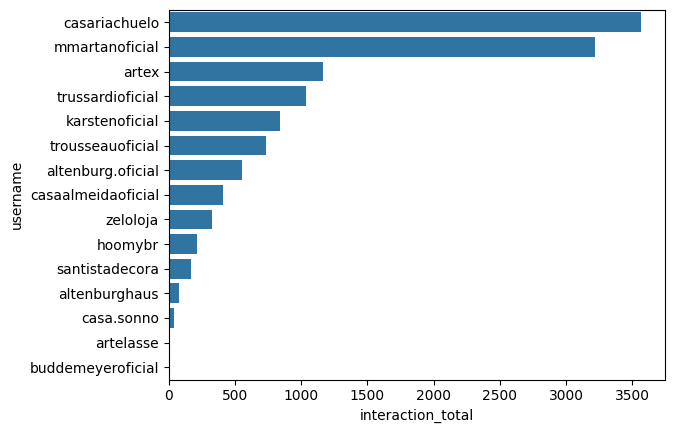

In [379]:
import seaborn as sns
df_plot = df_plot.sort_values('interaction_total', ascending=False)
df_idx = pd.DataFrame()
df_idx["username"] = df_plot['username']
df_idx["reel"] = df_plot['interactions_reels']
df_idx["posts"] = df_plot['interactions_posts']
df_idx["carrossel"] = df_plot['interactions_carrossel']
sns.barplot(df_plot, y='username', x='interaction_total')
# https://seaborn.pydata.org/examples/part_whole_bars.html
# df_idx

In [ ]:
from commom.database.data_handler import DataHandler
from commom.database.queries.query_instagram_posts import QUERY_INSTAGRAM_POSTS
from commom.instagram_data.instagram_data_manager import InstagramDataManager

data_handler = DataHandler()
dataManager = InstagramDataManager()

res = dataManager.fetch_user_media_info(['artex'])
df_original = data_handler.read_from_bigquery(query=QUERY_INSTAGRAM_POSTS)

novodf = dataManager.update_posts_dataset(df_original, res)
novodf.to_pickle('instagram_posts.pkl')

[INNOVATION-LOG] [fetch_user_media_info] [Line (79)] [INFO]: InstagramDataManager -> Fetching posts - init
[INNOVATION-LOG] [fetch_user_media_info] [Line (83)] [INFO]: InstagramDataManager -> Service: instagram_scrapper_api
[INNOVATION-LOG] [fetch_user_media_info] [Line (112)] [INFO]: InstagramDataManager -> Fetching posts - end
[INNOVATION-LOG] [update_posts_dataset] [Line (121)] [INFO]: InstagramDataManager -> Update dataset - START
[INNOVATION-LOG] [update_posts_dataset] [Line (148)] [INFO]: InstagramDataManager -> Update dataset - END


/Users/administrador/Desktop/ammo/innovation-api/src/commom/instagram_data/instagram_data_manager.py:126: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_temp = pd.concat([df_temp, post.to_dataframe()])
/Users/administrador/Desktop/ammo/innovation-api/src/commom/instagram_data/instagram_data_manager.py:146: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.fillna(fillZeroColumnsDict, inplace=True)


In [4]:
novodf.columns

Index(['code', 'comment_count', 'is_pinned', 'is_video',
       'like_and_view_counts_disabled', 'like_count', 'media_name',
       'share_count', 'user_id', 'username', 'created_at_utc', 'id',
       'last_update', 'text', 'ig_play_count', 'is_paid_partnership',
       'play_count', 'did_report_as_spam', 'hashtags', 'mentions',
       'video_duration', 'carousel_media_count', 'carousel_media_ids'],
      dtype='object')

In [8]:
df_original.columns

Index(['code', 'commentCount', 'isPinned', 'isVideo',
       'likeAndviewcountsdisabled', 'likeCount', 'mediaName', 'shareCount',
       'userId', 'username', 'createdAtutc', 'id', 'lastUpdate', 'text',
       'igPlaycount', 'isPaidpartnership', 'playCount', 'didReportasspam',
       'hashtags', 'mentions', 'videoDuration', 'carouselMediacount',
       'carouselMediaids'],
      dtype='object')

In [6]:
renameDict = {
    'likeAndviewcountsdisabled': 'like_and_view_counts_disabled',
    'createdAtutc': 'created_at_utc',
    'igPlaycount': 'ig_play_count',
    'isPaidpartnership': 'is_paid_partnership',
    'didReportasspam':'did_report_as_spam',
    'carouselMediacount':'carousel_media_count',
    'carouselMediaids': 'carousel_media_ids',
    'commentCount':'comment_count',
    'isPinned':'is_pinned', 
    'isVideo':'is_video',
    'likeCount':'like_count',
    'mediaName':'media_name',
    'shareCount':'share_count',
    'userId': 'user_id',
    'lastUpdate':'last_update',
    'playCount': 'play_count',
    'videoDuration':'video_duration',
}


datasetNew = df_original.rename(columns=renameDict)
df = data_handler.write_to_bigquery(dataset_id='innovation_dataset', table_id='instagram_posts', dataframe=datasetNew)
print(df.columns)
df

[INNOVATION-LOG] [write_to_bigquery] [Line (41)] [INFO]: Connection to BigQuery successful
[INNOVATION-LOG] [write_to_bigquery] [Line (51)] [INFO]: write done
Index(['code', 'comment_count', 'is_pinned', 'is_video',
       'like_and_view_counts_disabled', 'like_count', 'media_name',
       'share_count', 'user_id', 'username', 'created_at_utc', 'id',
       'last_update', 'text', 'ig_play_count', 'is_paid_partnership',
       'play_count', 'did_report_as_spam', 'hashtags', 'mentions',
       'video_duration', 'carousel_media_count', 'carousel_media_ids'],
      dtype='object')


,code,comment_count,is_pinned,is_video,like_and_view_counts_disabled,like_count,media_name,share_count,user_id,username,...,text,ig_play_count,is_paid_partnership,play_count,did_report_as_spam,hashtags,mentions,video_duration,carousel_media_count,carousel_media_ids
0,DCXlnd4ybXA,3,False,False,False,37,post,0,1256753216,altenburg.oficial,...,Aproveite o esquenta BLACKAlt e renove suas to...,0,False,0,False,"['#Altenburg', '#bemestar', '#blackfriday']",[],0.000,0,[]
1,DChOdVpPgnV,0,False,False,False,3,post,0,42856773759,altenburghaus,...,A Black Friday Haus começou!\n\nÉ o momento de...,0,False,0,False,"['#AltenburgHaus', '#BlackFriday']",[],0.000,0,[]
2,DCHeioQuydI,0,False,False,False,30,post,0,42856773759,altenburghaus,...,Nossa linha de aromas traz o melhor da naturez...,0,False,0,False,"['#AltenburgHaus', '#CasaCor']",[],0.000,0,[]
3,DCCUztVAdwc,0,False,False,False,23,post,0,42856773759,altenburghaus,...,Inspire-se na beleza natural que invade os esp...,0,False,0,False,"['#AltenburgHaus', '#Décor']",[],0.000,0,[]
4,DB_bPu5tAww,0,False,False,False,23,post,0,42856773759,altenburghaus,...,"No ambiente Rumah Deca, criado pela arquiteto ...",0,False,0,False,"['#AltenburgHaus', '#CasaCor']",['@liosimas'],0.000,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,DCKCgMluu8F,74,False,True,True,3,reel,0,54589723272,hoomybr,...,A fórmula perfeita pra um sono verdadeiramente...,4378,False,4378,False,[],[],68.634,0,[]
158,DCFHkMoSImz,3,False,True,True,3,reel,0,54589723272,hoomybr,...,A melhor notícia do ano: Black Friday Hoomy co...,4488,False,4488,False,[],[],5.733,0,[]
159,DCCoHCiyiDZ,259,False,True,True,3,reel,0,54589723272,hoomybr,...,Qual a melhor forma de saber se a toalha não p...,618346,False,618346,False,[],[],184.300,0,[]
160,DB_3ZN_O7IB,0,False,True,True,3,reel,0,54589723272,hoomybr,...,Sem black fraude por aqui! 🚫\n\nVocê esperou o...,5547,False,5547,False,[],[],36.600,0,[]
